# Apple Stock

### Step 1.필요한 librarie들을 import 하세요

In [1]:
import pandas as pd
import numpy as np

### Step 2. 다음과 같은 DataSet을 import 하세요 [address](https://raw.githubusercontent.com/myoh0623/dataset/main/appl_1980_2014.csv)

In [2]:
url = "https://raw.githubusercontent.com/myoh0623/dataset/main/appl_1980_2014.csv"
apple = pd.read_csv(url)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 3. apple 라는 변수에 DataFrame을 할당 하세요

### Step 4. 각 column들의 data type을 확인하세요

In [3]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Date column을 datetime type으로 변경하세요

In [7]:
apple.Date = pd.to_datetime(apple.Date)

In [8]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6. Date column을 index로 설정하세요

In [9]:
apple.set_index("Date", inplace=True, drop=True)

In [10]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7. 중복된 date가 존재 하는지 확인하세요

In [13]:
apple.index.is_unique # 중복된 데이터가 없다. 

True

### Step 8. index를 오름차순으로 정렬하세요.

In [14]:
apple.sort_index(ascending=True, inplace=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. 매월 마지막 영업일 가져오세요 (business day of each month)

In [16]:
apple.loc["1981-01-30"]

Open               28.50
High               28.50
Low                28.25
Close              28.25
Volume       11547200.00
Adj Close           0.44
Name: 1981-01-30 00:00:00, dtype: float64

In [23]:
apple.resample('BME').last()
# apple.resample("BME").apply(lambda x: x.iloc[-1])

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43


In [20]:
# 매월 평균을 가져오세요(BM 를 기준으로) (business day of each month)

In [25]:
apple.resample("BME").mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


### Step 10. 주가가 등록된 첫날과 마지막 날의 차이는 몇일인가요?

In [29]:
-(apple.index[0] - apple.index[-1]).days

12261

### Step 11. 영업달 기준으로 몇달간의 데이터가 저장되어있나요?

In [35]:
len(apple.resample("BME").last())

404

In [30]:
len(apple.resample("BME"))

404

### Step 12. 'Adj Close'값을 이용해 종가 그래프를 그려보세요
- `plt.plot`
- 코드를 강사와 공유해 보세요

In [36]:
!pip install matplotlib

In [37]:
import matplotlib.pyplot as plt

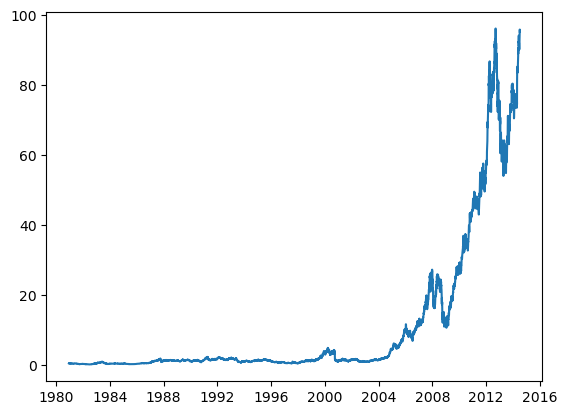

In [39]:
plt.plot(apple["Adj Close"])
plt.show()

# 거래량과 종가 

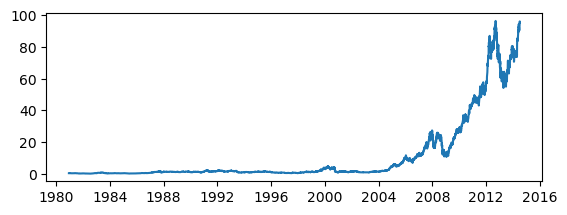

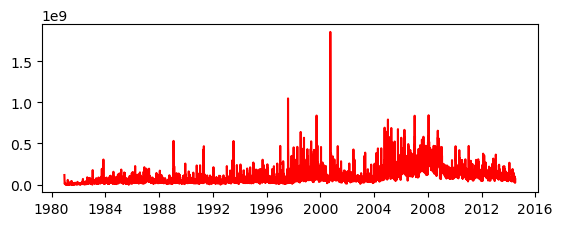

In [44]:
fig = plt.figure()
ax_1 = fig.add_subplot(2,1,1)
ax_1.plot(apple.index,apple["Adj Close"])

fig = plt.figure()
ax_2 = fig.add_subplot(2,1,2)
ax_2.plot(apple.index,apple["Volume"], color="r")

plt.show()